- MOVIE RATINGS PREDICTION 

Every dataset has a story and this set is pulled from IMDb.com of all the Indian movies on the platform.To build a model that predicts the rating of a movie based on features like genre, director, and actors, we'll need to follow these steps:

1. Load and inspect the data 

2. Preprocess the data
- Handle missing values.
- Convert categorical variables to numerical values (encoding).
- Extract features and the target variable.

The preprocessed dataset has 7,707 rows and 11,850 features. The next steps are to split the data into training and testing sets and then train a regression mode.

3. Handle missing values - Rows with missing Rating, Year, Genre, Director, or Actor 1 are dropped.

4. Encode categorical variables - Categorical variables (Genre, Director, Actor 1, Actor 2, Actor 3) are converted to numerical values using one-hot encoding.

5. Extract relevant features 

6. Split the data into training and testing sets 

7. Train a regression model - A Linear Regression model is trained on the training set.

8. Evaluate the model - Predictions are made on the test set, and the model's performance is evaluated using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

- The dataset contains the following columns:

Name: Name of the movie

Year: Year of release

Duration: Duration of the movie

Genre: Genre of the movie

Rating: IMDb rating of the movie

Votes: Number of votes

Director: Director of the movie

Actor 1: First actor

Actor 2: Second actor

Actor 3: Third actor

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

1. Load the Dataset 

In [90]:
file_path = '/Users/rishikasingh/Downloads/IMDb Movies India.csv'
df= pd.read_csv(file_path, encoding='ISO-8859-1')

2. Handling missing values

In [91]:
df.dropna(subset=['Rating'], inplace=True)  # Drop rows where Rating is missing
df['Year'] = df['Year'].str.extract('(\d{4})')  # Extract year as a numeric value
df.dropna(subset=['Year', 'Genre', 'Director', 'Actor 1'], inplace=True)  # Drop rows where essential features are missing

3. Convert categorical variables to numerical values using one-hot encoding

In [92]:
df_encoded = pd.get_dummies(df, columns=['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], drop_first=True)

# Convert 'Year' to integer type
df_encoded['Year'] = df_encoded['Year'].astype(int)

# Extract features and target variable
X = df_encoded.drop(['Name', 'Rating', 'Votes', 'Duration'], axis=1)
y = df_encoded['Rating']

4. Split the data into training and testing sets

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Train a Linear Regression model

In [94]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

6. Predict on the test set

In [95]:
y_pred = model.predict(X_test)

7. Evaluate the model

In [96]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 3460760004.4621997
Root Mean Squared Error: 6246121908.748691


- Dataset Analysis and extracting trends

1. Year with the Best Rating: Finds the year with the highest average rating.

2. Impact of Movie Length on Rating: Plots the relationship between movie duration and rating.

3. Top 10 Movies According to Rating per Year and Overall: Finds the top 10 movies overall and per year based on ratings.

4. Number of Popular Movies Released Each Year: Counts movies with a rating of 7 or higher per year.

5. Counting the Number of Votes and Their Impact on Ratings: Plots the relationship between the number of votes and ratings.

6. Director with the Most Movies: Finds the director who directed the most movies.

7. Actor with the Most Movies: Finds the actor who starred in the most movies (considering Actor 1, Actor 2, and Actor 3).

Additional Trends:
- Average rating per genre.
- Trend of average ratings over the years.

1. Year with Best Rating

In [97]:
best_rating_year = df.groupby('Year')['Rating'].mean().idxmax()
print(f"Year with the best average rating: {best_rating_year}")

Year with the best average rating: 1948


2. Top 10 Movies According to Rating per Year and Overall

In [98]:
top_10_overall = df.nlargest(10, 'Rating')[['Name', 'Year', 'Rating']]
print("Top 10 Movies Overall:")
print(top_10_overall)

top_10_per_year = df.groupby('Year').apply(lambda x: x.nlargest(10, 'Rating'))
print("Top 10 Movies per Year:")
print(top_10_per_year)

Top 10 Movies Overall:
                      Name  Year  Rating
8339       Love Qubool Hai  2020    10.0
5410            Half Songs  2021     9.7
2563                 Breed  2020     9.6
5077          Gho Gho Rani  2019     9.4
6852                  June  2021     9.4
11704             Ram-Path  2017     9.4
14222  The Reluctant Crime  2020     9.4
1314          Ashok Vatika  2018     9.3
1729              Baikunth  2021     9.3
5125           God of gods  2019     9.3
Top 10 Movies per Year:
                              Name  Year Duration                      Genre  \
Year                                                                           
1917 8146              Lanka Dahan  1917      NaN  Adventure, Drama, Fantasy   
1931 7203                  Kalidas  1931      NaN    Drama, History, Musical   
     14161  The Light of the World  1931  124 min             Drama, Fantasy   
     4171                 Draupadi  1931  124 min                      Drama   
1932 6073             

/var/folders/xh/fhh8sf_548b21rdgs6kzbm280000gn/T/ipykernel_4894/1436610954.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_per_year = df.groupby('Year').apply(lambda x: x.nlargest(10, 'Rating'))


3. Impact of Movie Length on Rating

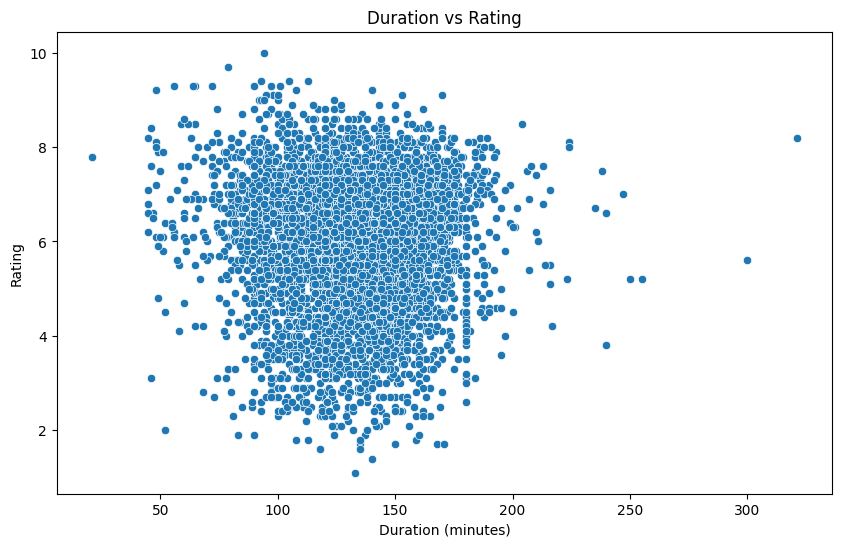

In [99]:
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(float)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Rating', data=df)
plt.title('Duration vs Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()

4. Number of Popular Movies Released Each Year

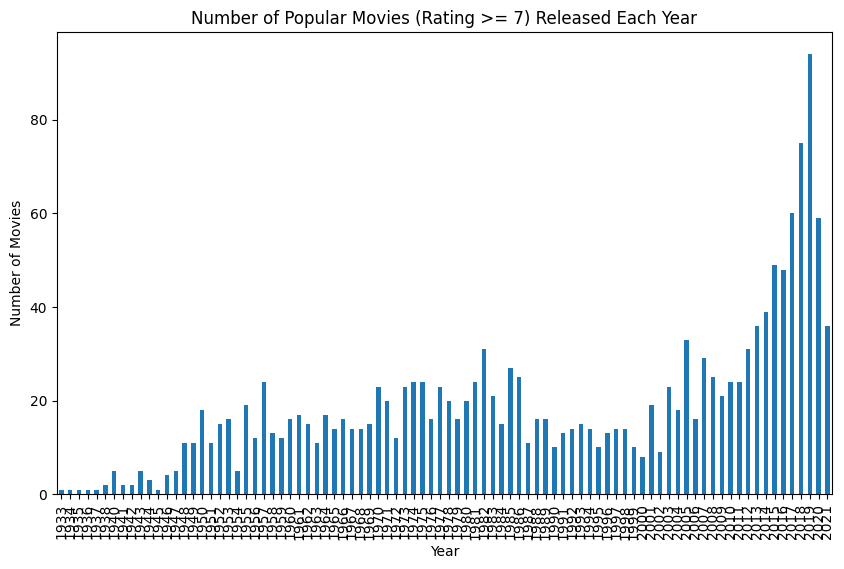

In [100]:
popular_movies_per_year = df[df['Rating'] >= 7].groupby('Year').size()
plt.figure(figsize=(10, 6))
popular_movies_per_year.plot(kind='bar')
plt.title('Number of Popular Movies (Rating >= 7) Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

5. Counting the Number of Votes and Their Impact on Ratings

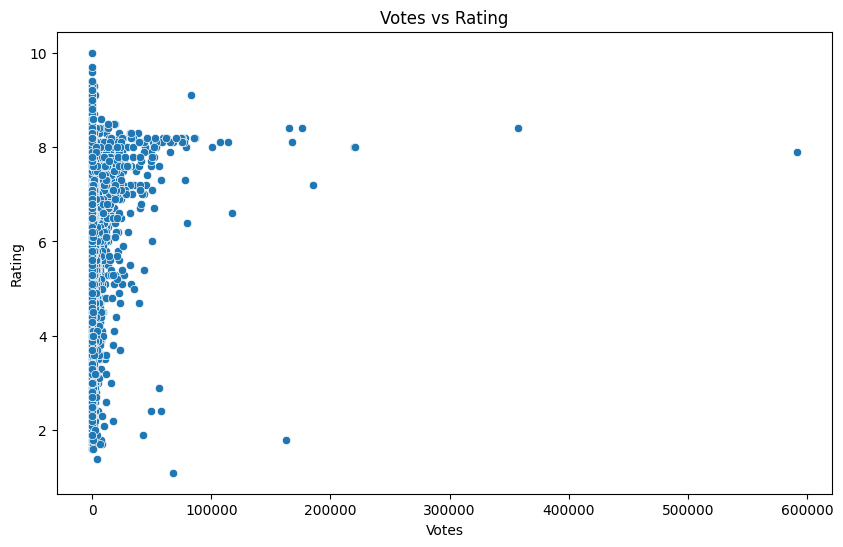

In [101]:
df['Votes'] = df['Votes'].str.replace(',', '').astype(float)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Rating', data=df)
plt.title('Votes vs Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

6. Director with the Most Movies

In [102]:
most_movies_director = df['Director'].value_counts().idxmax()
print(f"Director with the most movies: {most_movies_director}")

Director with the most movies: Mahesh Bhatt


7. Actor with the Most Movies

In [103]:
most_movies_actor = df[['Actor 1', 'Actor 2', 'Actor 3']].melt(value_name='Actor').dropna()['Actor'].value_counts().idxmax()
print(f"Actor with the most movies: {most_movies_actor}")

Actor with the most movies: Mithun Chakraborty


- Average Rating per Genre

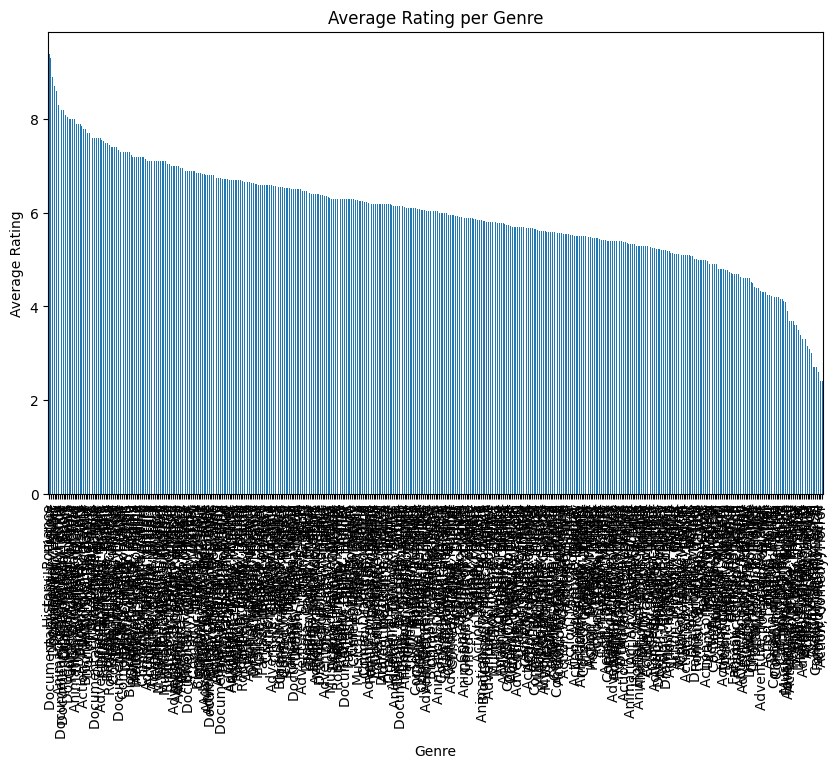

In [104]:
average_rating_per_genre = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
average_rating_per_genre.plot(kind='bar')
plt.title('Average Rating per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

- Future Prediction: Trend of Average Ratings Over the Years

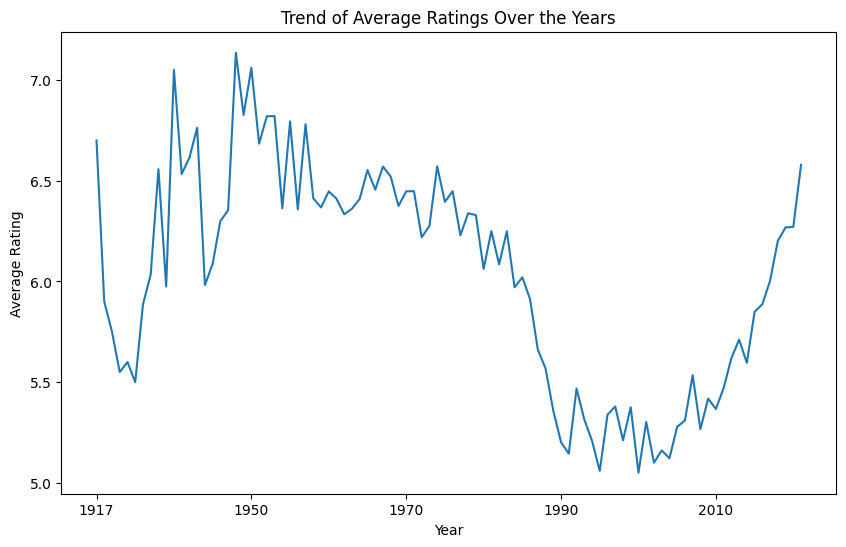

In [105]:
average_rating_per_year = df.groupby('Year')['Rating'].mean()
plt.figure(figsize=(10, 6))
average_rating_per_year.plot(kind='line')
plt.title('Trend of Average Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

- Visualisations

1. Distribution of Ratings: Visualizes the distribution of movie ratings using a histogram with a KDE (Kernel Density Estimate).

2. Scatter plot of Actual vs Predicted Ratings: Compares the actual and predicted ratings with a scatter plot and a reference line.

3. Distribution of Residuals: Visualizes the residuals (differences between actual and predicted ratings) to check for normal distribution.

4. Feature Importance: Shows the top 20 most important features based on the coefficients from the linear regression model.

1. Distribution of Ratings

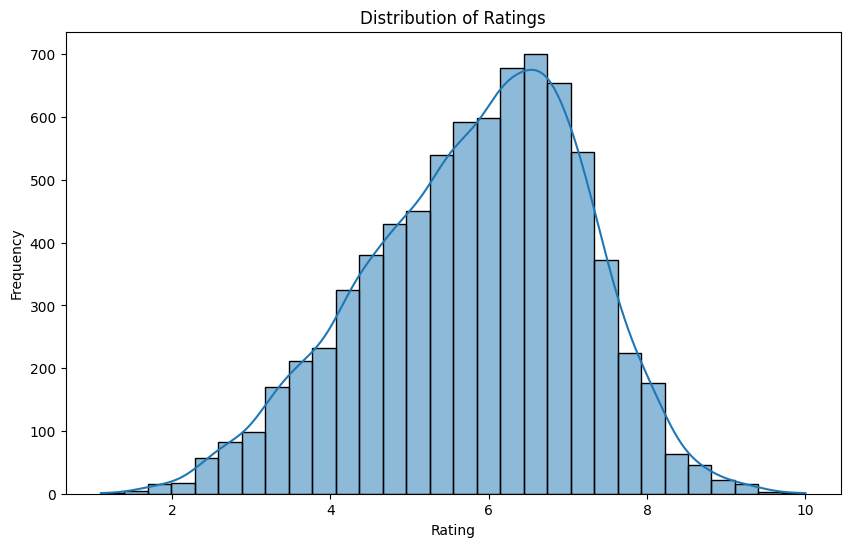

In [106]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

2. Scatter plot of Actual vs Predicted Ratings

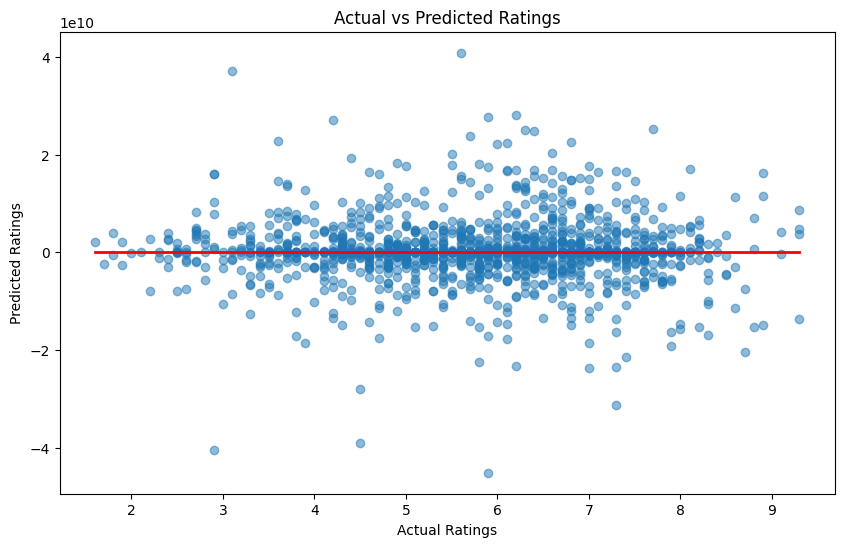

In [107]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

3. Distribution of Residuals

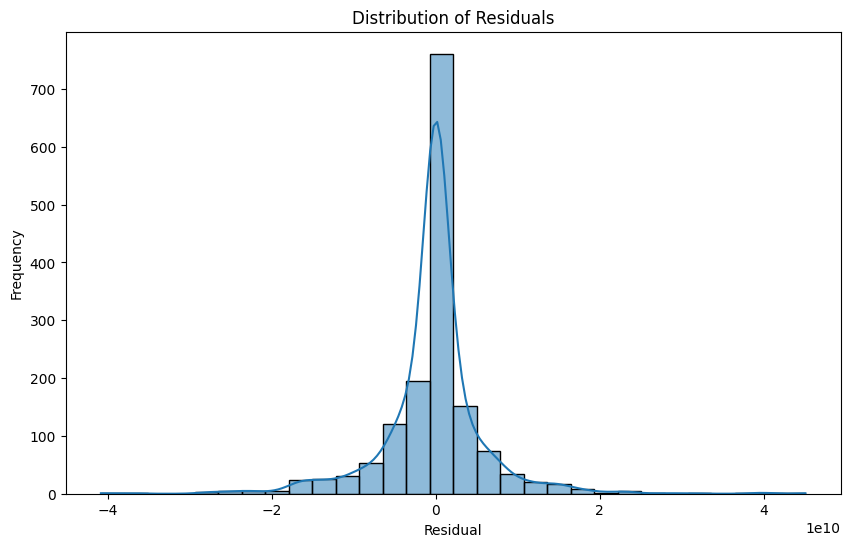

In [108]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

4. Feature Importance

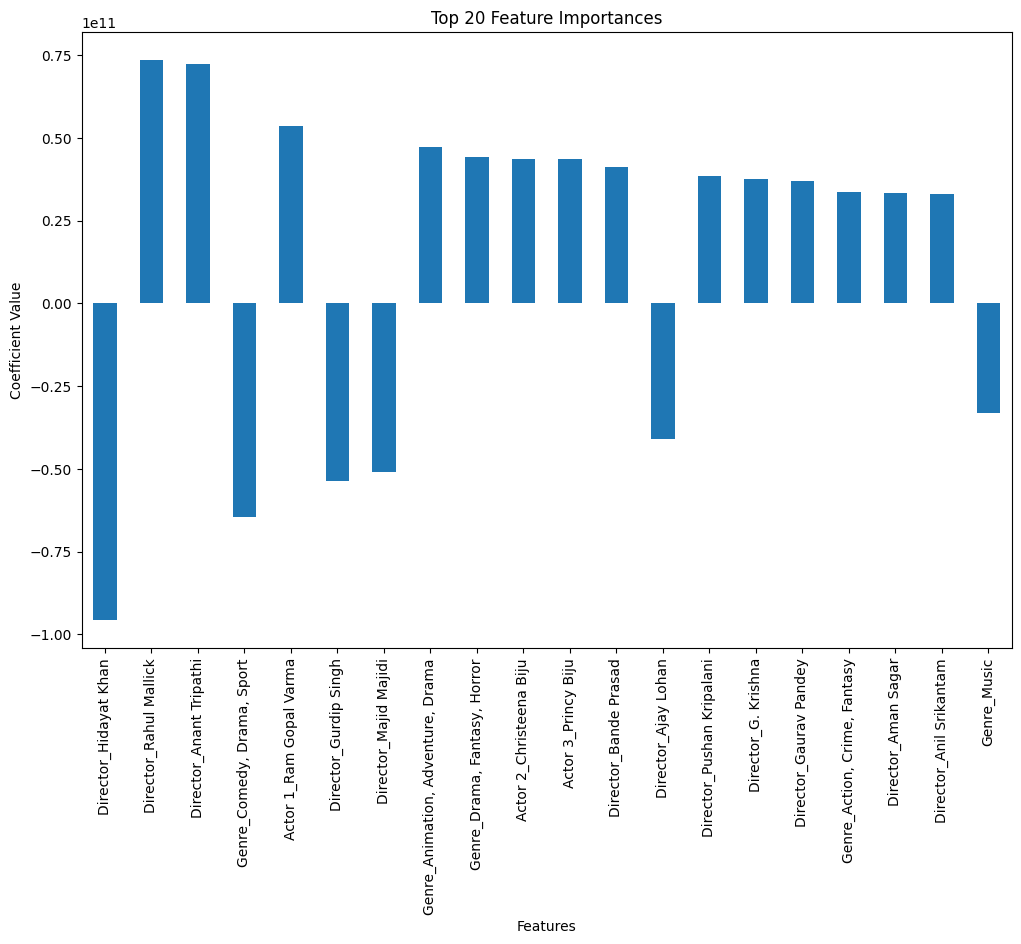

In [109]:
coefficients = pd.Series(model.coef_, index=X_train.columns)
top_features = coefficients.abs().sort_values(ascending=False).head(20).index
plt.figure(figsize=(12, 8))
coefficients[top_features].plot(kind='bar')
plt.title('Top 20 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()